In [45]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 6

# Load the pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create the data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'


)  # Normalize pixel values between 0 and 1
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../SFSU_Art'
val_dir = '../SFSU_Art'
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

# Add your own classification layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




Found 188 images belonging to 6 classes.
Found 188 images belonging to 6 classes.


In [46]:
# Train the model on your preprocessed dataset
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

print("Done!")

Epoch 1/15
6/6 [==============================] - 39s 7s/step - loss: 1.0251 - accuracy: 0.6170 - val_loss: 0.2595 - val_accuracy: 0.9309
Epoch 2/15
6/6 [==============================] - 33s 6s/step - loss: 0.1663 - accuracy: 0.9734 - val_loss: 0.0629 - val_accuracy: 0.9947
Epoch 3/15
6/6 [==============================] - 31s 6s/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9947
Epoch 4/15
6/6 [==============================] - 30s 5s/step - loss: 0.0298 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9947
Epoch 5/15
6/6 [==============================] - 29s 5s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 6/15
6/6 [==============================] - 27s 5s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7/15
6/6 [==============================] - 34s 6s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 8/15
6/6 [==================

In [41]:
print(history.history['accuracy'])  # Access training accuracy
print(history.history['loss'])  # Access training loss
print(history.history['val_accuracy'])  # Access validation accuracy
print(history.history['val_loss'])  # Access validation loss

[0.7819148898124695]
[0.6636686325073242]
[1.0]
[0.03300269693136215]


# Learning Curves

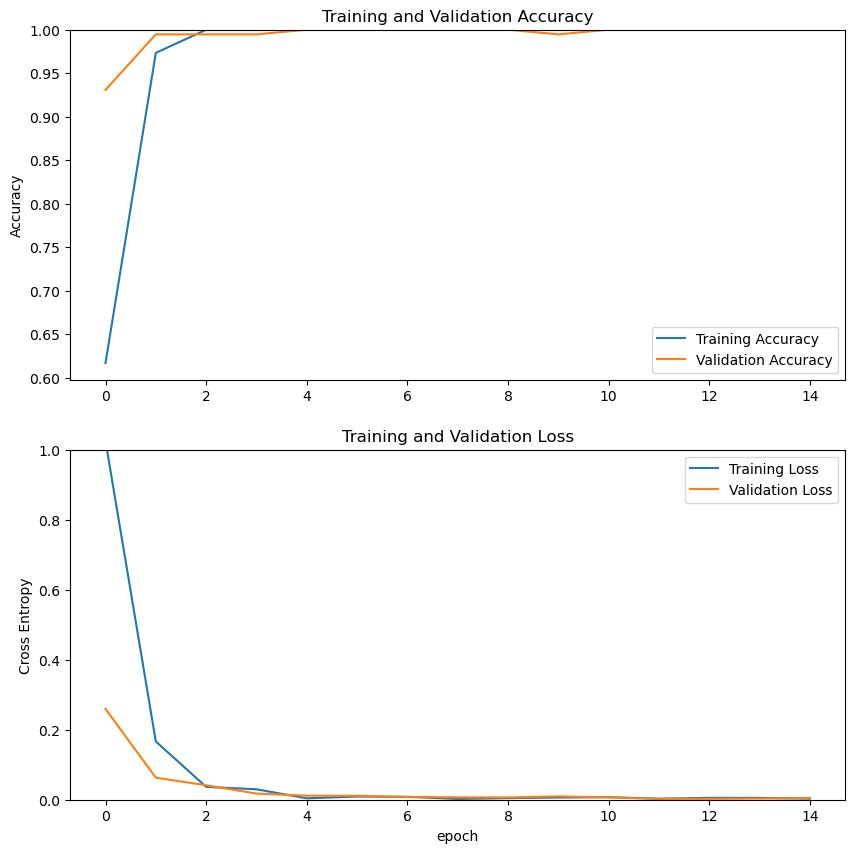

In [47]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# Save Models
---

In [23]:
model.save('./models/mobileNet')
print("Done!")

INFO:tensorflow:Assets written to: ./models/mobileNet/assets


INFO:tensorflow:Assets written to: ./models/mobileNet/assets


Done!


## TensorFlow Lite

In [27]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('./models/mobileNet_lite/mobileNet.tflite', 'wb') as f:
    f.write(tflite_model)
print("done!")

INFO:tensorflow:Assets written to: /tmp/tmp8a7nthcl/assets


INFO:tensorflow:Assets written to: /tmp/tmp8a7nthcl/assets


done!


2023-05-15 19:59:37.332447: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-05-15 19:59:37.332477: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-05-15 19:59:37.332668: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp8a7nthcl
2023-05-15 19:59:37.359581: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-15 19:59:37.359620: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp8a7nthcl
2023-05-15 19:59:37.461775: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-05-15 19:59:37.971818: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp8a7nthcl
2023-05-15 19:59:38.128216: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 795550 